# Further data exploration: PCA and GMM

- initialize usefull stuff to work on

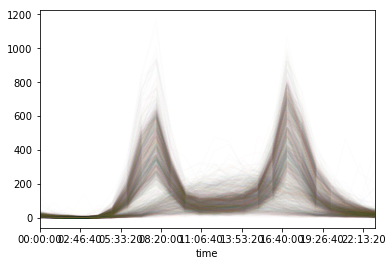

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
from jupyterworkflow.data import get_freemont_data

data = get_freemont_data()

pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

- 'pivoted' dataframe size is 24 hours x 1732 days

In [18]:
X = pivoted.fillna(0).T.values
X.shape

(1732, 24)

In [19]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

- we reduced the number of our 'features' to 2

In [20]:
X2.shape

(1732, 2)

- plot the result to see what's going on now

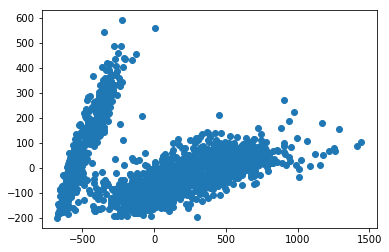

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X2[:,0], X2[:,1])

- we clearly see we have 2 types of days, distributed in 2 clusters
- we will try to identify those 2 clsuters automatically now (with a Gaussian Mixture Model)

In [22]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels[60:100]

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

- now have labels on each day, telling wether this day belongs to cluster 0 or 1

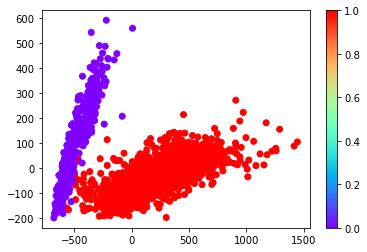

In [23]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

- now let's work on each cluster separately

In [24]:
pivoted.shape

(24, 1732)

In [25]:
pivoted.head(5)

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2017-06-21,2017-06-22,2017-06-23,2017-06-24,2017-06-25,2017-06-26,2017-06-27,2017-06-28,2017-06-29,2017-06-30
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,7.0,14.0,25.0,28.0,23.0,13.0,17.0,16.0,9.0,20.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,7.0,15.0,6.0,12.0,13.0,6.0,13.0,7.0,2.0,21.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,5.0,3.0,7.0,23.0,12.0,3.0,8.0,2.0,1.0,6.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,4.0,4.0,5.0,7.0,4.0,2.0,4.0,4.0,3.0,2.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,6.0,17.0,15.0,7.0,6.0,3.0,7.0,13.0,6.0,9.0


In [26]:
labels.shape

(1732,)

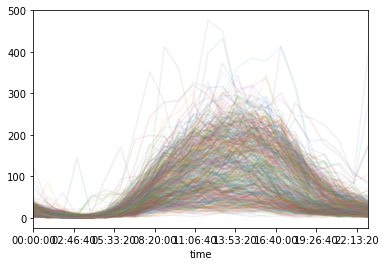

In [27]:
pivoted.T[labels==0].T.plot(legend=False, alpha=0.1)
# also works:
#pivoted[pivoted.columns[labels==0]].plot(legend=False, alpha=0.1)

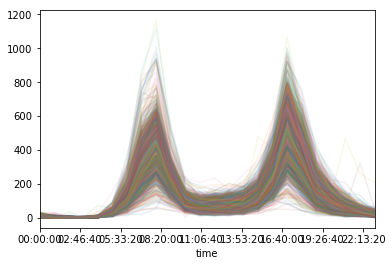

In [28]:
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1)

In [29]:
pivoted.columns

Index([2012-10-03, 2012-10-04, 2012-10-05, 2012-10-06, 2012-10-07, 2012-10-08,
       2012-10-09, 2012-10-10, 2012-10-11, 2012-10-12,
       ...
       2017-06-21, 2017-06-22, 2017-06-23, 2017-06-24, 2017-06-25, 2017-06-26,
       2017-06-27, 2017-06-28, 2017-06-29, 2017-06-30],
      dtype='object', length=1732)

- convert the columns labels into a date time labels. Reason is there is an attribute 'dayofweek' for it
- we can thus only plot days of the week with short commands

In [30]:
daysofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
daysofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            2, 3, 4, 5, 6, 0, 1, 2, 3, 4],
           dtype='int64', length=1732)

- we clearly see one of the distribution corresponds to the week end (saturday = 5 and sunday = 6)

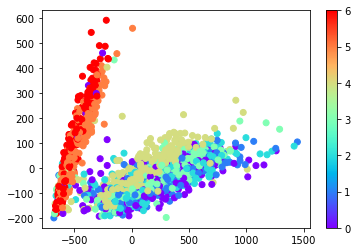

In [31]:
plt.scatter(X2[:,0], X2[:,1], c=daysofweek, cmap='rainbow')
plt.colorbar()

- now let's investigate those days that belong to the weekend cluster, but that are not weekends days
- if we look at carefully the output dates, we recognize national holidays

In [32]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (daysofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', length=1196, freq=None)